# Analysis of diffusion of empty blocks on Cardano mainnet

## Set up

In [1]:
suppressMessages({
    require(RColorBrewer, quietly=TRUE)
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

## Fetch data from pooltool.io

The script [fetch.sh](fetch.sh) queries a `cardano-db-sync` instance and fetches arrival data from https://pooltool.io/ for one empty block in each epoch.

## Read arrival data.

In [2]:
timings <- fread("timings.tsv.gz")
timings %>% summary

     Epoch            Slot           Milliseconds from slot time
 Min.   :353.0   Min.   : 67340429   Min.   :-63923.0           
 1st Qu.:405.0   1st Qu.: 89814354   1st Qu.:   203.0           
 Median :459.0   Median :113121813   Median :   309.0           
 Mean   :459.6   Mean   :113396675   Mean   :   477.1           
 3rd Qu.:512.0   3rd Qu.:136036635   3rd Qu.:   467.0           
 Max.   :573.0   Max.   :162206668   Max.   : 96310.0           

## Clean up data

Only retain the first 99.5th percentile of results, ignoring extremely poorly performing nodes.

In [3]:
tMin <- 0
tMax <- timings[, quantile(`Milliseconds from slot time`, 0.995)]
tMax

99.5% 
3642.88

## Exploratory analysis

### Histogram of block arrival times

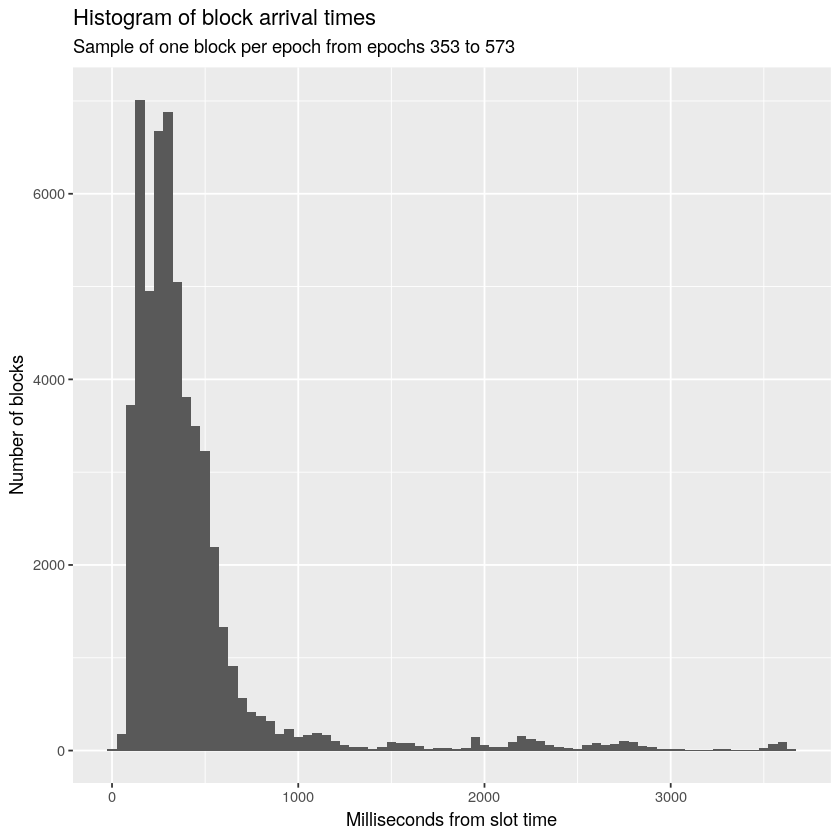

In [4]:
ggplot(
    timings[`Milliseconds from slot time` >= tMin & `Milliseconds from slot time` <= tMax],
    aes(x=`Milliseconds from slot time`)
) +
    geom_histogram(binwidth=50) +
    ylab("Number of blocks") +
    ggtitle(
        "Histogram of block arrival times", 
        "Sample of one block per epoch from epochs 353 to 573"
    )

In [5]:
ggsave("empty-rb-histogram.svg", units="in", dpi=150, width=8, height=6)

### Diffusion of empty Praos blocks on Cardano mainnet

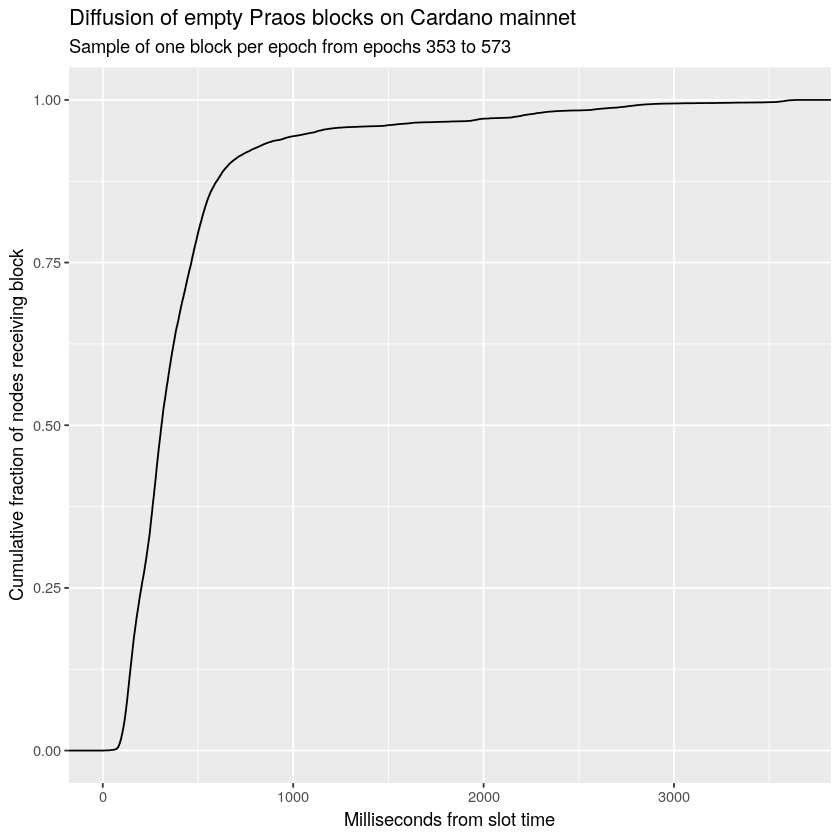

In [6]:
ggplot(
    timings[`Milliseconds from slot time` >= tMin & `Milliseconds from slot time` <= tMax],
    aes(x=`Milliseconds from slot time`)
) +
    stat_ecdf() +
    ylab("Cumulative fraction of nodes receiving block") +
    ggtitle(
        "Diffusion of empty Praos blocks on Cardano mainnet", 
        "Sample of one block per epoch from epochs 353 to 573"
    )

In [7]:
ggsave("empty-rb-ecdf.svg", units="in", dpi=150, width=8, height=6)

### Quantiles of arrival times

In [8]:
timings[, quantile(`Milliseconds from slot time`, c(0.5, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 0.995, 0.999))]

50%      75%      80%      85%      90%      95%      99%    99.5% 
  309.00   467.00   508.00   561.00   675.00  1169.20  3108.20  3642.88 
   99.9% 
13969.99

### Quantile for 1000 ms arrival

In [9]:
timings[, ecdf(`Milliseconds from slot time`)](1000)

[1] 0.9395891

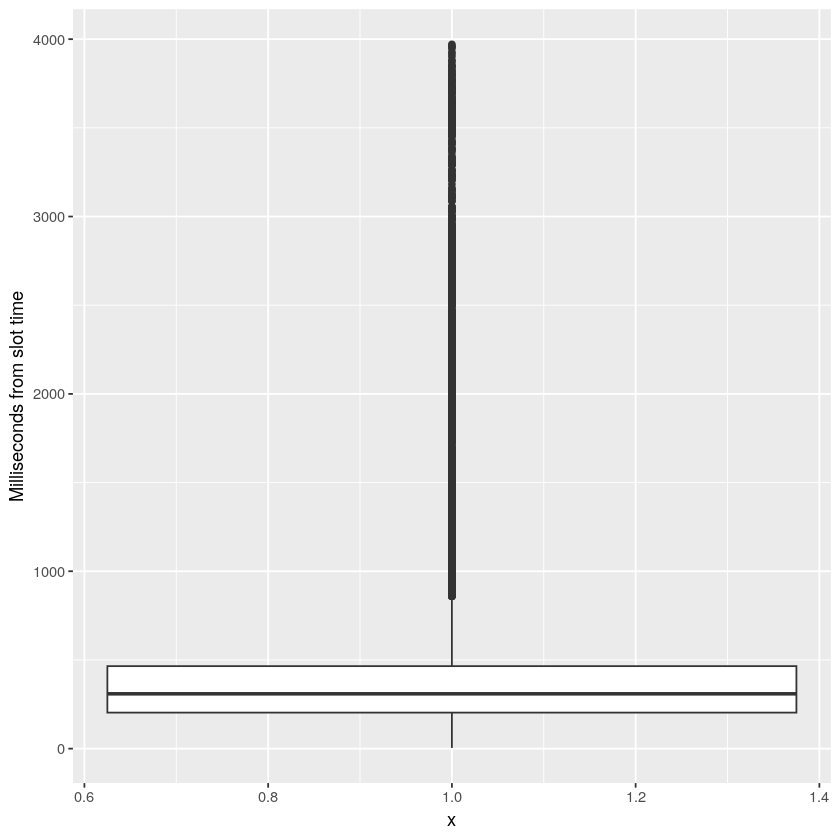

In [10]:
ggplot(timings[`Milliseconds from slot time` > 0 & `Milliseconds from slot time` < 4000], aes(x=1, y=`Milliseconds from slot time`)) + geom_boxplot()

### Check for heteroscedasticiy

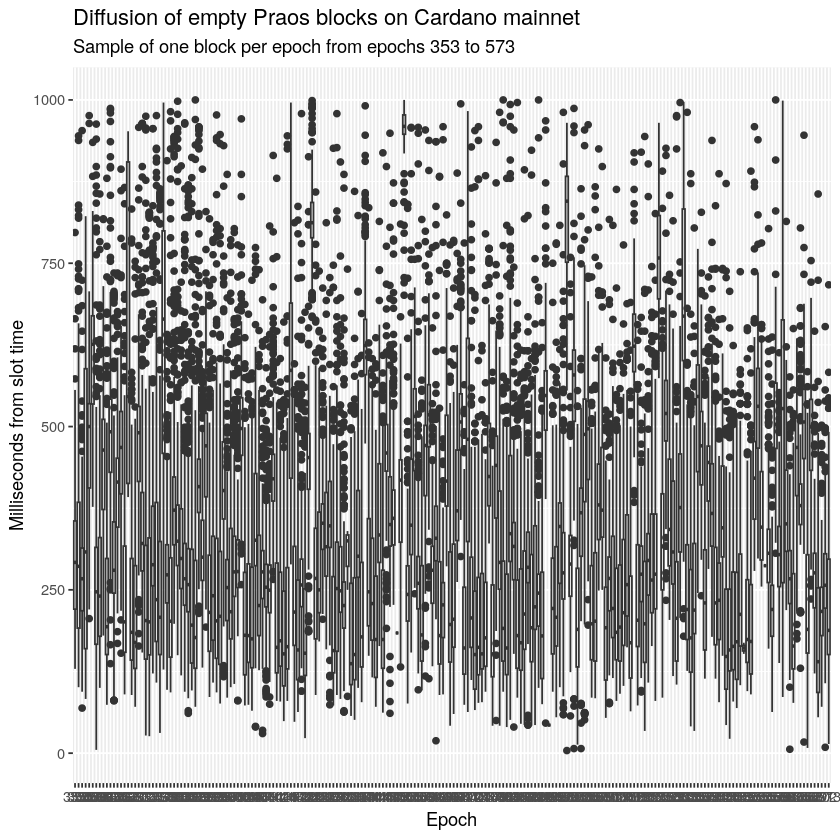

In [11]:
ggplot(timings[`Milliseconds from slot time` >= 0 & `Milliseconds from slot time` <= 1000, .(`Epoch`=factor(`Epoch`), `Milliseconds from slot time`)], aes(x=`Epoch`, y=`Milliseconds from slot time`)) +
    geom_boxplot() +
    ggtitle(
        "Diffusion of empty Praos blocks on Cardano mainnet", 
        "Sample of one block per epoch from epochs 353 to 573"
    )